In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from pytorch_tabnet.tab_model import TabNetClassifier
from sklearn.linear_model import LogisticRegression
import time

# Preprocessing for NN
from torch.utils.data import TensorDataset, DataLoader, Subset
import random

# NN
import torch
import torch.nn as nn
import torch.nn.functional as F

from sklearn.model_selection import ParameterGrid, KFold, StratifiedKFold

# Plot
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [12, 6]

# define plt and sns styles
sns.set_style("whitegrid")
sns.set_palette("Set2")

In [3]:
df_train = pd.read_csv('data/Processed_CongressionalVotingID.shuf.lrn.csv')
df_train.head()

,Class,Handicapped Infants,Water Project Cost Sharing,Adoption Of The Budget Resolution,Physician Fee Freeze,El Salvador Aid,Religious Groups In Schools,Anti Satellite Test Ban,Aid To Nicaraguan Contras,Mx Missile,Immigration,Synfuels Crporation Cutback,Education Spending,Superfund Right To Sue,Crime,Duty Free Exports,Export Administration Act South Africa
0,1,0.4,0.2,0.6,0.2,0.4,0.4,0.8,0.6,0.6,0.6,0.2,0.4,0.4,0.4,0.6,1.0
1,0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.4
3,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
4,1,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0


label_encoder = LabelEncoder()
df_train['NObeyesdad'] = label_encoder.fit_transform(df_train['NObeyesdad'])
df_train.head()

In [4]:
# Splitting of the target column
X_train = df_train.drop(['Class'], axis=1)
y_train = df_train['Class']
X_train.head()


,Handicapped Infants,Water Project Cost Sharing,Adoption Of The Budget Resolution,Physician Fee Freeze,El Salvador Aid,Religious Groups In Schools,Anti Satellite Test Ban,Aid To Nicaraguan Contras,Mx Missile,Immigration,Synfuels Crporation Cutback,Education Spending,Superfund Right To Sue,Crime,Duty Free Exports,Export Administration Act South Africa
0,0.4,0.2,0.6,0.2,0.4,0.4,0.8,0.6,0.6,0.6,0.2,0.4,0.4,0.4,0.6,1.0
1,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.4
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
4,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0


<Axes: >

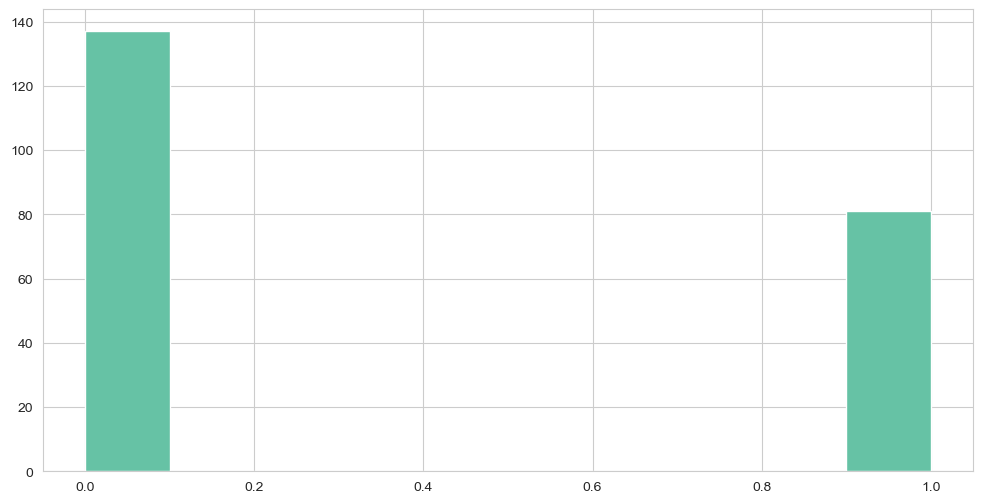

In [5]:
df_train.Class.hist()

In [6]:
df_train.Class.describe()

count    218.000000
mean       0.371560
std        0.484334
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Class, dtype: float64

In [7]:
# Splitting of the target column
X_train = df_train.drop(['Class'], axis=1)
y_train = df_train['Class']
X_train

,Handicapped Infants,Water Project Cost Sharing,Adoption Of The Budget Resolution,Physician Fee Freeze,El Salvador Aid,Religious Groups In Schools,Anti Satellite Test Ban,Aid To Nicaraguan Contras,Mx Missile,Immigration,Synfuels Crporation Cutback,Education Spending,Superfund Right To Sue,Crime,Duty Free Exports,Export Administration Act South Africa
0,0.4,0.2,0.6,0.2,0.4,0.4,0.8,0.6,0.6,0.6,0.2,0.4,0.4,0.4,0.6,1.0
1,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.4
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
4,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
214,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
215,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
216,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0


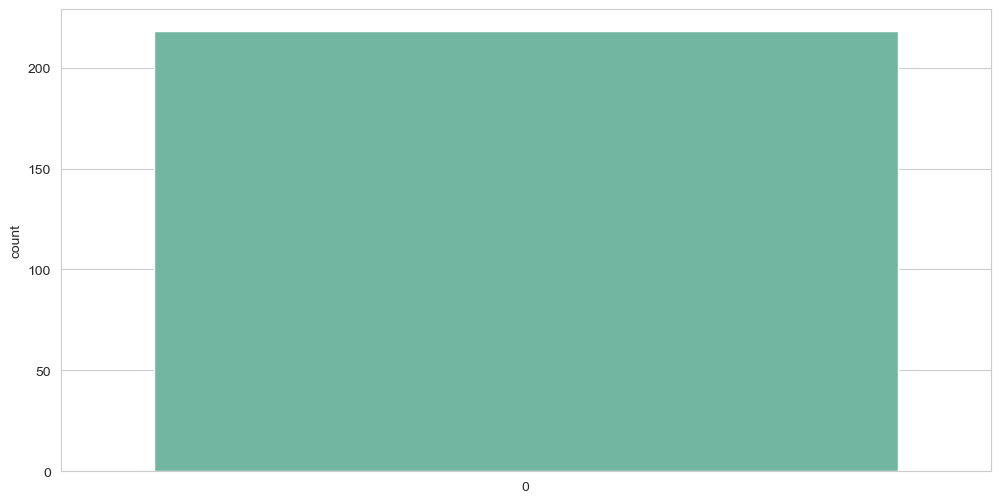

In [8]:
# plot the distribution of the target labels
sns.countplot(y_train)
plt.show()

In [9]:
features = X_train.to_numpy()
labels = y_train.to_numpy()

# Convert arrays to PyTorch tensors
features_tensor = torch.tensor(features, dtype=torch.float32)
labels_tensor = torch.tensor(labels, dtype=torch.float32)  # or torch.long for classification labels

# Create a TensorDataset and DataLoader for batching
dataset = TensorDataset(features_tensor, labels_tensor)
dataloader = DataLoader(dataset, batch_size=2, shuffle=True)

## NN Implementation

In [10]:
# different activation functions, number of layers, number of neurons
class BasicNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(BasicNN, self).__init__()
        self.layer1 = nn.Linear(input_size, hidden_size)
        self.layer2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.log_softmax(self.layer2(x), dim=1)
        return x

In [11]:
net = BasicNN(input_size=16, hidden_size=60, output_size=2)
print(net)

BasicNN(
  (layer1): Linear(in_features=16, out_features=60, bias=True)
  (layer2): Linear(in_features=60, out_features=2, bias=True)
)


In [12]:
criterion = nn.NLLLoss()
#criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr=0.001)


In [13]:
num_epochs = 10

for epoch in range(num_epochs):
    for batch_features, batch_labels in dataloader:
        # Forward pass: Compute predicted y by passing x to the model
        pred_y = net(batch_features)

        # Compute and print loss
        loss = criterion(pred_y, batch_labels.long())  # labels should be of type long for NLLLoss

        # Zero gradients, perform a backward pass, and update the weights.
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

In [14]:
# Calculate mse with train data
pred_y = net(features_tensor)
loss = criterion(pred_y, labels_tensor.long())
print(loss.item())

0.06354919821023941


In [15]:
_, predicted_labels = torch.max(pred_y, 1)
predicted_labels

tensor([0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,
        0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
        1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
        1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
        1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
        1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
        1, 0])

##  Flexible NN approach

In [16]:
class FlexibleNN(nn.Module):
    def __init__(self, layer_sizes, activation_fn):
        super(FlexibleNN, self).__init__()
        self.layers = nn.ModuleList()
        for i in range(len(layer_sizes) - 1):
            self.layers.append(nn.Linear(layer_sizes[i], layer_sizes[i+1]))
        self.activation_fn = activation_fn

    def forward(self, x):
        for layer in self.layers[:-1]:  # Apply activation function to all but last layer
            x = self.activation_fn(layer(x))
        x = F.log_softmax(self.layers[-1](x), dim=1)  # Last layer with log softmax
        return x

In [17]:
def train_evaluate_model(params, train_loader, val_loader):
    net = FlexibleNN(layer_sizes=params['layer_sizes'], activation_fn=params['activation_fn'])
    criterion = nn.NLLLoss()
    #criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(net.parameters(), lr=params['lr'])

    num_epochs = 10
    all_losses = []

    for epoch in range(num_epochs):
        for batch_features, batch_labels in train_loader:
            pred_y = net(batch_features)
            loss = criterion(pred_y, batch_labels.long())

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        # Evaluate on validation set
        all_preds = []
        all_labels = []
        for batch_features, batch_labels in val_loader:
            pred_y = net(batch_features)
            all_preds.extend(pred_y.argmax(dim=1).tolist())
            all_labels.extend(batch_labels.tolist())

        # Store the loss for this fold
        all_losses.append(loss.item())

    accuracy = accuracy_score(all_labels, all_preds)
    precision = precision_score(all_labels, all_preds, average='macro', zero_division=0)
    recall = recall_score(all_labels, all_preds, average='macro', zero_division=0)
    f1 = f1_score(all_labels, all_preds, average='macro')
    # calculate a confusion matrix
    cm = confusion_matrix(all_labels, all_preds)

    # Return the average loss over all folds
    avg_loss = sum(all_losses) / len(all_losses)

    return (avg_loss, accuracy, precision, recall, f1), cm

In [18]:
parameters_grid = {
    'layer_sizes': [[16, 20, 10, 2], [16, 30, 10, 2], [16, 30, 20, 10, 2], [16, 40, 30, 20, 10, 2], [16, 50, 20, 10, 2], [16, 100, 50, 20, 10, 2], 
                    [16, 200, 100, 50, 20, 10, 2], [16, 300, 200, 100, 50, 20, 10, 2], [16, 400, 300, 200, 100, 50, 20, 10, 2], [16, 500, 400, 300, 200, 100, 50, 20, 10, 2]],
    'activation_fn': [F.relu, torch.tanh, torch.sigmoid],
    'lr': [0.001, 0.01, 0.1, 0.2, 0.3]
}

## Grid Search

In [19]:
full_start_time = time.time()
skf = StratifiedKFold(n_splits=5)
results = []

# Implementing grid search from scratch
for params in ParameterGrid(parameters_grid):
    all_metrics = []
    all_cm = []
    start_time = time.time()
    labels_np = np.array(labels)

    for train_idx, val_idx in skf.split(np.zeros(len(labels_np)), labels_np):
        train_loader = DataLoader(Subset(dataset, train_idx), batch_size=64)
        val_loader = DataLoader(Subset(dataset, val_idx), batch_size=64)
        metrics, cm = train_evaluate_model(params, train_loader, val_loader)
        all_metrics.append(metrics)
        all_cm.append(cm)

    params['activation_fn'] = params['activation_fn'].__name__

    avg_metrics = [sum(metric) / len(metric) for metric in zip(*all_metrics)]
    stacked_cm = np.stack(all_cm, axis=2)
    avg_cm = stacked_cm.mean(axis=2)
    elapsed_time = time.time() - start_time
    results.append({'params': params, 'loss': avg_metrics[0], 'accuracy': avg_metrics[1], 'precision': avg_metrics[2], 'recall': avg_metrics[3], 'f1': avg_metrics[4], 'time': elapsed_time, 'cm': avg_cm})

print("Total time elapsed:", time.time() - full_start_time)

# Saving the results in a DataFrame
df_results = pd.DataFrame(results)

Total time elapsed: 25.822517156600952


params       {'activation_fn': 'tanh', 'layer_sizes': [16, ...
loss                                                  0.080922
accuracy                                              0.935941
precision                                             0.932747
recall                                                0.931956
f1                                                    0.931456
time                                                  0.092313
cm                                  [[26.0, 1.4], [1.4, 14.8]]
Name: 52, dtype: object
Best Loss: 0.08092231947463005
Best Params: {'activation_fn': 'tanh', 'layer_sizes': [16, 20, 10, 2], 'lr': 0.1}


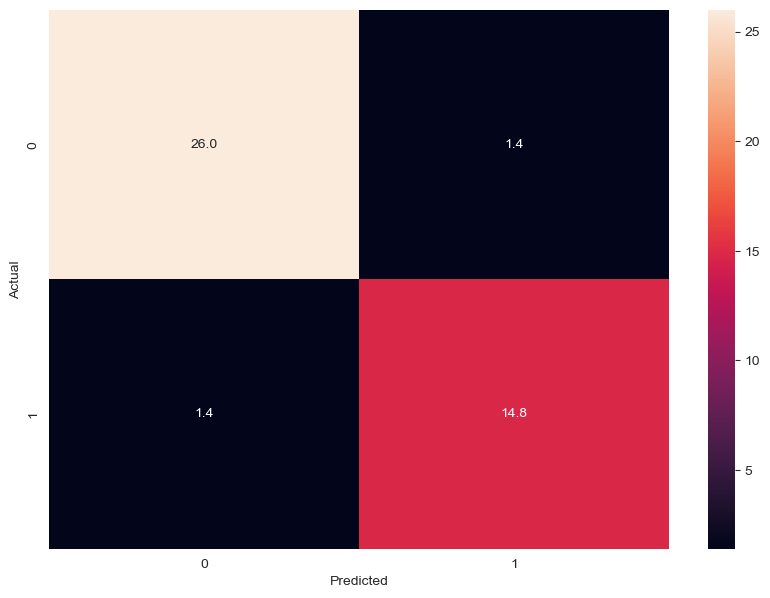

<Figure size 1200x600 with 0 Axes>

In [20]:
best_run = df_results.loc[df_results['loss'].idxmin()]
print(best_run)
print("Best Loss:", best_run['loss'])
print("Best Params:", best_run['params'])
plt.figure(figsize=(10,7))
sns.heatmap(best_run['cm'], annot=True, fmt=".1f")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
plt.savefig('voting_confusion_matrix_grid_search_best.png')

## Random Search

In [21]:
def random_search_from_grid(parameters_grid, num_iterations, dataset):
    skf = StratifiedKFold(n_splits=5)
    results = []

    for _ in range(num_iterations):
        start_time = time.time()
        layer_sizes = random.choice(parameters_grid['layer_sizes'])
        activation_fn = random.choice(parameters_grid['activation_fn'])
        lr = random.choice(parameters_grid['lr'])

        params = {
            'layer_sizes': layer_sizes,
            'activation_fn': activation_fn,
            'lr': lr
        }

        all_metrics = []
        all_cm = []

        labels_np = np.array(labels)

        for train_idx, val_idx in skf.split(np.zeros(len(labels_np)), labels_np):
            train_loader = DataLoader(Subset(dataset, train_idx), batch_size=64)
            val_loader = DataLoader(Subset(dataset, val_idx), batch_size=64)
            metrics, cm = train_evaluate_model(params, train_loader, val_loader)
            all_metrics.append(metrics)
            all_cm.append(cm)

        params['activation_fn'] = params['activation_fn'].__name__

        avg_metrics = [sum(metric) / len(metric) for metric in zip(*all_metrics)]
        stacked_cm = np.stack(all_cm, axis=2)
        avg_cm = stacked_cm.mean(axis=2)


        elapsed_time = time.time() - start_time
        results.append({'params': params, 'loss': avg_metrics[0], 'accuracy': avg_metrics[1], 'precision': avg_metrics[2], 'recall': avg_metrics[3], 'f1': avg_metrics[4], 'time': elapsed_time, 'cm': avg_cm})

        print(f"Loss: {avg_metrics[0]}, Accuracy: {avg_metrics[1]}, Precision: {avg_metrics[2]}, Recall: {avg_metrics[3]}, F1: {avg_metrics[4]}, Params: {params}")

    df_results = pd.DataFrame(results)

    return df_results

full_start_time = time.time()
df_results_random = random_search_from_grid(parameters_grid, 50, dataset)
print(f"Total time: {time.time() - full_start_time}")

Loss: 0.5382012312253937, Accuracy: 0.8628964059196618, Precision: 0.7956800144300143, Recall: 0.8389628073451603, F1: 0.8101433641559692, Params: {'layer_sizes': [16, 50, 20, 10, 2], 'activation_fn': 'relu', 'lr': 0.2}
Loss: 0.14727210503071547, Accuracy: 0.9495771670190274, Precision: 0.9477819974143504, Recall: 0.9449813258636788, F1: 0.946016413592494, Params: {'layer_sizes': [16, 40, 30, 20, 10, 2], 'activation_fn': 'tanh', 'lr': 0.01}
Loss: 7.888121460676193, Accuracy: 0.6784355179704017, Precision: 0.42903278267119227, Recall: 0.566884531590414, F1: 0.47949644225506294, Params: {'layer_sizes': [16, 400, 300, 200, 100, 50, 20, 10, 2], 'activation_fn': 'relu', 'lr': 0.1}
Loss: 0.6619289696216584, Accuracy: 0.6284355179704016, Precision: 0.3142177589852008, Recall: 0.5, F1: 0.38589760786943883, Params: {'layer_sizes': [16, 300, 200, 100, 50, 20, 10, 2], 'activation_fn': 'sigmoid', 'lr': 0.1}
Loss: 0.6284249967336655, Accuracy: 0.8267441860465116, Precision: 0.7937677265263472, Reca

params       {'layer_sizes': [16, 20, 10, 2], 'activation_f...
loss                                                  0.083368
accuracy                                              0.926638
precision                                             0.923747
recall                                                0.924681
f1                                                    0.921849
time                                                  0.092511
cm                                  [[25.6, 1.8], [1.4, 14.8]]
Name: 18, dtype: object
Best Loss: 0.08336848710663616
Best Params: {'layer_sizes': [16, 20, 10, 2], 'activation_fn': 'relu', 'lr': 0.1}


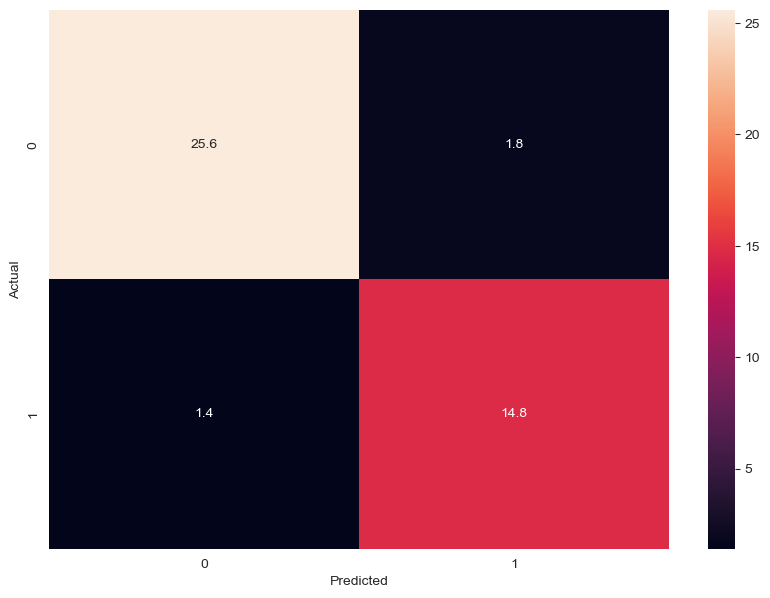

<Figure size 1200x600 with 0 Axes>

In [22]:
best_run = df_results_random.loc[df_results_random['loss'].idxmin()]
print(best_run)
print("Best Loss:", best_run['loss'])
print("Best Params:", best_run['params'])
plt.figure(figsize=(10,7))
sns.heatmap(best_run['cm'], annot=True, fmt=".1f")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
plt.savefig('voting_confusion_matrix_random_search_best.png')

In [23]:
df_results_random.sort_values(by='loss', ascending=True, inplace=True)
df_results_random.head()

,params,loss,accuracy,precision,recall,f1,time,cm
18,"{'layer_sizes': [16, 20, 10, 2], 'activation_f...",0.083368,0.926638,0.923747,0.924681,0.921849,0.092511,"[[25.6, 1.8], [1.4, 14.8]]"
1,"{'layer_sizes': [16, 40, 30, 20, 10, 2], 'acti...",0.147272,0.949577,0.947782,0.944981,0.946016,0.126036,"[[26.4, 1.0], [1.2, 15.0]]"
22,"{'layer_sizes': [16, 50, 20, 10, 2], 'activati...",0.153501,0.940486,0.937542,0.937574,0.936959,0.113838,"[[26.0, 1.4], [1.2, 15.0]]"
29,"{'layer_sizes': [16, 30, 10, 2], 'activation_f...",0.155303,0.944926,0.939795,0.943824,0.941577,0.094453,"[[26.0, 1.4], [1.0, 15.2]]"
35,"{'layer_sizes': [16, 50, 20, 10, 2], 'activati...",0.192761,0.954334,0.949618,0.953778,0.951205,0.109518,"[[26.2, 1.2], [0.8, 15.4]]"


## Evaluation of Results

In [24]:
# save a copy of the results dataframe in another df
df_results_random_copy = df_results_random.copy()
df_results_copy = df_results.copy()

In [25]:
df_results_random = df_results_random_copy.copy()
df_results = df_results_copy.copy()

In [26]:
df_results['search_method'] = 'grid_search'
df_results_random['search_method'] = 'random_search'

df_results = pd.concat([df_results.drop(['params'], axis=1), df_results['params'].apply(pd.Series)], axis=1)

df_results_random = pd.concat([df_results_random.drop(['params'], axis=1), df_results_random['params'].apply(pd.Series)], axis=1)

df_result = pd.concat([df_results, df_results_random], axis=0)
df_result.head()

,loss,accuracy,precision,recall,f1,time,cm,search_method,activation_fn,layer_sizes,lr
0,0.650352,0.678436,0.518874,0.587500,0.506028,0.139013,"[[26.0, 1.4], [12.6, 3.6]]",grid_search,relu,"[16, 20, 10, 2]",0.001
1,0.313284,0.931501,0.927098,0.928252,0.927116,0.092601,"[[25.8, 1.6], [1.4, 14.8]]",grid_search,relu,"[16, 20, 10, 2]",0.010
2,0.084366,0.931501,0.928387,0.928385,0.927219,0.091591,"[[25.8, 1.6], [1.4, 14.8]]",grid_search,relu,"[16, 20, 10, 2]",0.100
3,0.333968,0.872199,0.805967,0.841410,0.818975,0.091094,"[[26.2, 1.2], [4.4, 11.8]]",grid_search,relu,"[16, 20, 10, 2]",0.200
4,0.665100,0.921987,0.925487,0.916488,0.915301,0.091257,"[[25.8, 1.6], [1.8, 14.4]]",grid_search,relu,"[16, 20, 10, 2]",0.300


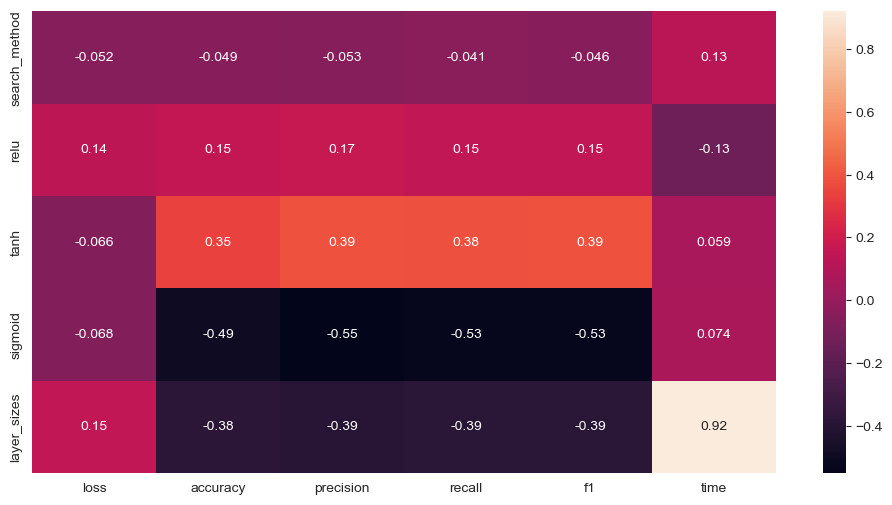

In [27]:
# mapping search
# 0: grid_search
# 1: random_search

# mapping activation_fn
# 0: relu
# 1: tanh
# 2: sigmoid

df_correlation = df_result.copy()

df_correlation.drop(['cm'], axis=1, inplace=True)

df_correlation['search_method'] = df_correlation['search_method'].map({'grid_search': 0, 'random_search': 1})
df_correlation['activation_fn'] = df_correlation['activation_fn'].map({'relu': 0, 'tanh': 1, 'sigmoid': 2})
df_correlation['layer_sizes'] = df_correlation['layer_sizes'].apply(lambda x: len(x))
df_correlation['relu'] = df_correlation['activation_fn'].apply(lambda x: 1 if x == 0 else 0)
df_correlation['tanh'] = df_correlation['activation_fn'].apply(lambda x: 1 if x == 1 else 0)
df_correlation['sigmoid'] = df_correlation['activation_fn'].apply(lambda x: 1 if x == 2 else 0)

corr = df_correlation.corr()

corr_subset = corr.loc[['search_method', 'relu' , 'tanh', 'sigmoid', 'layer_sizes'],
                       ['loss', 'accuracy', 'precision', 'recall', 'f1', 'time']]

# Create a heatmap of the subset
sns.heatmap(corr_subset, annot=True)
plt.show()
plt.show()

### Trade-off between metrics

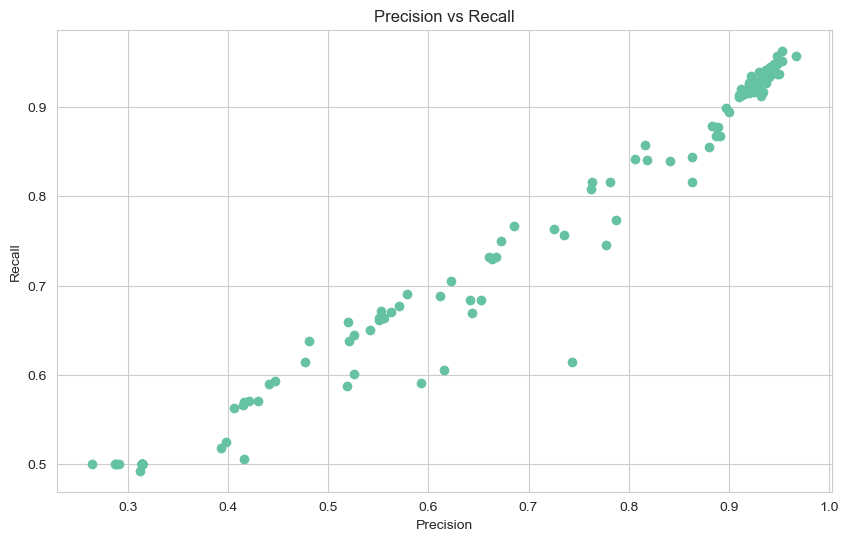

<Figure size 1200x600 with 0 Axes>

In [28]:
# Usually higher precision comes at the cost of lower recall and vice versa, 
# but in this case we can see that the model with the highest precision also has the highest recall. 
# This is because the model with the highest precision and recall is the model with the highest accuracy, 
# which is the model with the highest F1 score. This means that the model with the highest F1 score is the best model.

plt.figure(figsize=(10, 6))
plt.scatter(df_results['precision'], df_results['recall'])
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.title('Precision vs Recall')
plt.show()
plt.savefig('voting_precision_vs_recall_grid_search.png')

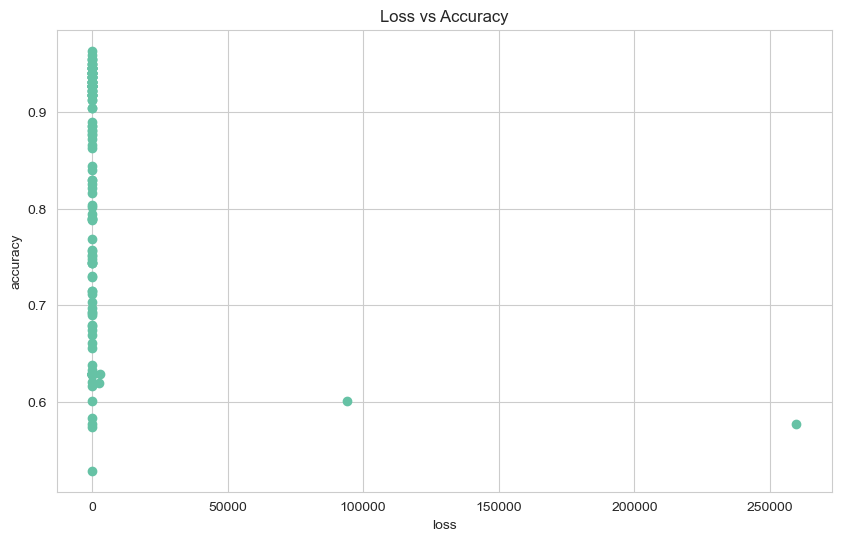

<Figure size 1200x600 with 0 Axes>

In [29]:
plt.figure(figsize=(10, 6))
plt.scatter(df_results['loss'], df_results['accuracy'])
plt.xlabel('loss')
plt.ylabel('accuracy')
plt.title('Loss vs Accuracy')
plt.show()
plt.savefig('voting_loss_vs_accuracy.png')

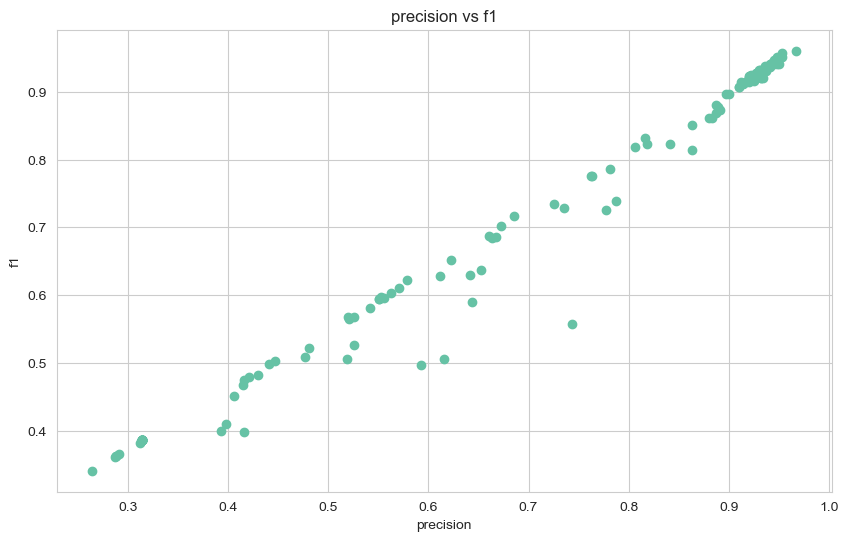

<Figure size 1200x600 with 0 Axes>

In [30]:
plt.figure(figsize=(10, 6))
plt.scatter(df_results['precision'], df_results['f1'])
plt.xlabel('precision')
plt.ylabel('f1')
plt.title('precision vs f1')
plt.show()
plt.savefig('voting_precision_vs_f1.png')

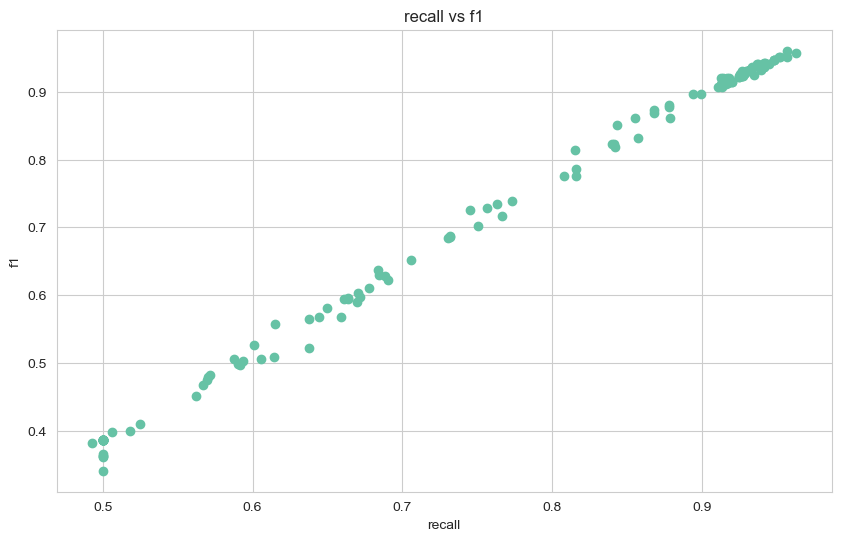

<Figure size 1200x600 with 0 Axes>

In [31]:
plt.figure(figsize=(10, 6))
plt.scatter(df_results['recall'], df_results['f1'])
plt.xlabel('recall')
plt.ylabel('f1')
plt.title('recall vs f1')
plt.show()
plt.savefig('voting_recall_vs_f1.png')

### Logistic Regression

In [32]:
def train_evaluate_logistic_regression(train_features, train_labels, val_features, val_labels):
    model = LogisticRegression(random_state=42, solver='liblinear', max_iter=1000)
    model.fit(train_features, train_labels)
   
    predictions = model.predict(val_features)
   
    #Evaluation metrics
    accuracy = accuracy_score(val_labels, predictions)
    precision = precision_score(val_labels, predictions, average='macro', zero_division=0)
    recall = recall_score(val_labels, predictions, average='macro', zero_division=0)
    f1 = f1_score(val_labels, predictions, average='macro')
    cm = confusion_matrix(val_labels, predictions)
   
    return accuracy, precision, recall, f1, cm

lr_metrics = []

#Create a StratifiedKFold object
skf = StratifiedKFold(n_splits=5)

results = pd.DataFrame(columns=["Accuracy", "Precision", "Recall", "F1", "Runtime"])

for fold, (train_index, val_index) in enumerate(skf.split(features, labels)):
    X_train, X_val = features[train_index], features[val_index]
    y_train, y_val = labels[train_index], labels[val_index]

    #Train and evaluate
    start_time = time.time()
    lr_accuracy, lr_precision, lr_recall, lr_f1, lr_cm = train_evaluate_logistic_regression(X_train, y_train, X_val, y_val)
    end_time = time.time()
    runtime = end_time - start_time

    #Results
    results.loc[fold] = [lr_accuracy, lr_precision, lr_recall, lr_f1, runtime]
    lr_metrics.append([lr_accuracy, lr_precision, lr_recall, lr_f1])
    
print("Default Logistic Regression Results:")
print(results)

Default Logistic Regression Results:
   Accuracy  Precision    Recall        F1   Runtime
0  0.909091   0.914943  0.893246  0.901786  0.010592
1  0.954545   0.950893  0.950893  0.950893  0.003825
2  0.931818   0.922658  0.933036  0.927273  0.003953
3  0.976744   0.982143  0.968750  0.974780  0.003814
4  0.953488   0.950231  0.950231  0.950231  0.004115


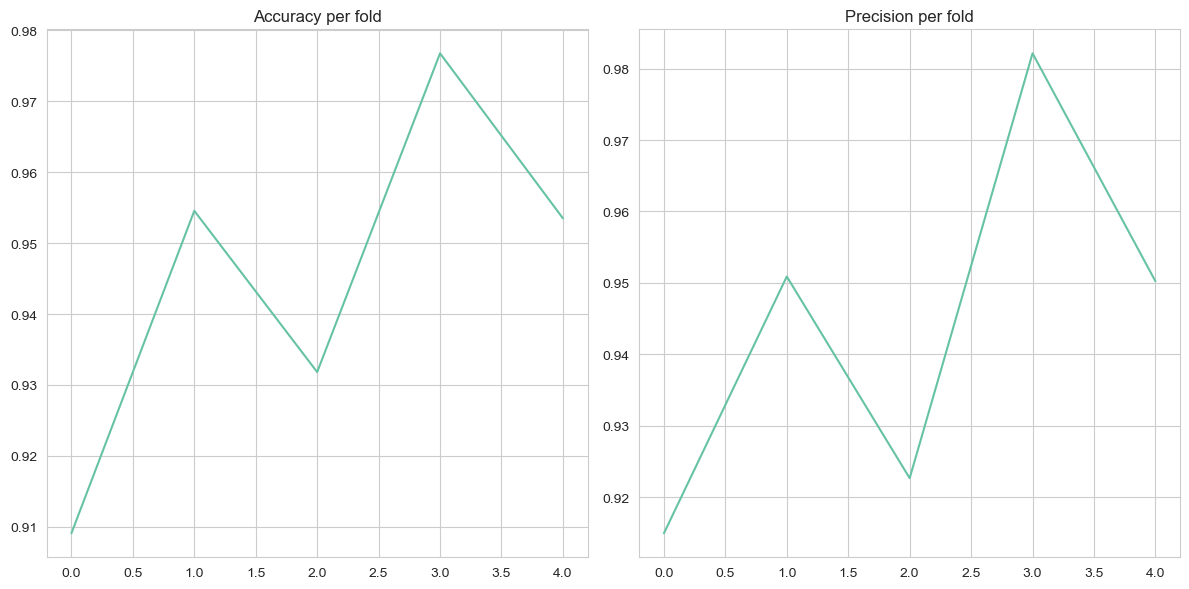

In [33]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(results.index, results['Accuracy'], label='Accuracy')
plt.title('Accuracy per fold')

plt.subplot(1, 2, 2)
plt.plot(results.index, results['Precision'], label='Precision')
plt.title('Precision per fold')

plt.tight_layout()
plt.show()

In [34]:
avg_lr_metrics = np.mean(lr_metrics, axis=0)
print("Average Metrics for Logistic Regression:")
print("Accuracy:", avg_lr_metrics[0])
print("Precision:", avg_lr_metrics[1])
print("Recall:", avg_lr_metrics[2])
print("F1 Score:", avg_lr_metrics[3])

Average Metrics for Logistic Regression:
Accuracy: 0.9451374207188161
Precision: 0.944173535314509
Recall: 0.9392312480547774
F1 Score: 0.9409925677667612


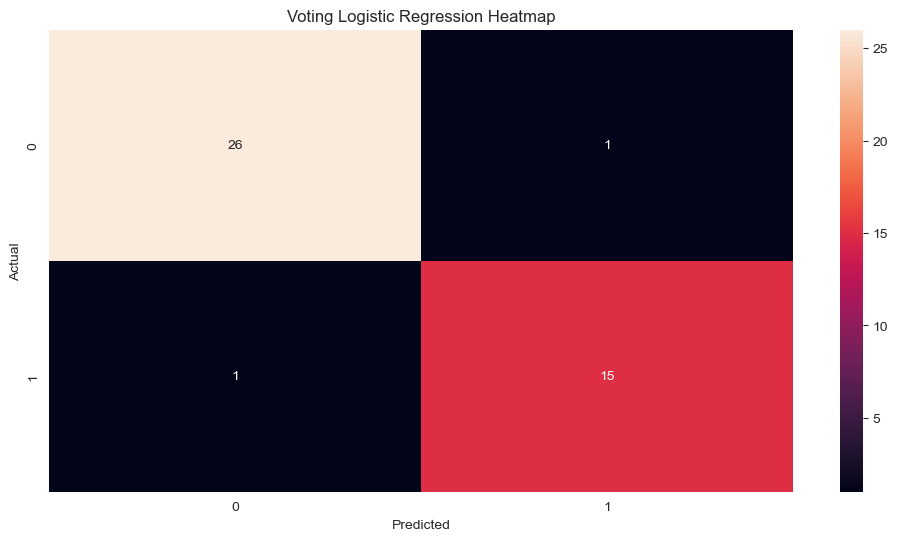

<Figure size 1200x600 with 0 Axes>

In [35]:
sns.heatmap(lr_cm, annot=True, fmt="d")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Voting Logistic Regression Heatmap')
plt.show()
plt.savefig('voting_lr_confusion.png')

### TabNet Model

In [36]:
X = df_train.drop('Class', axis=1)
y = df_train['Class']

def evaluate_model(model, X_val, y_val):
    all_preds = []
    all_labels = []
    pred_y = model.predict(X_val)
    all_preds.extend(pred_y.tolist())
    all_labels.extend(y_val.tolist())
    accuracy = accuracy_score(all_labels, all_preds)
    precision = precision_score(all_labels, all_preds, average='macro', zero_division=0)
    recall = recall_score(all_labels, all_preds, average='macro', zero_division=0)
    f1 = f1_score(all_labels, all_preds, average='macro')
    cm = confusion_matrix(all_labels, all_preds)
    return accuracy, precision, recall, f1, cm

tabnet_metrics = []


skf = StratifiedKFold(n_splits=5)

results = pd.DataFrame(columns=["Accuracy", "Precision", "Recall", "F1", "Runtime"])

for fold, (train_index, val_index) in enumerate(skf.split(X, y)):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]

#Convert Pandas DataFrames to NumPy arrays
    X_train = X_train.to_numpy()
    X_val = X_val.to_numpy()
    y_train = y_train.to_numpy()
    y_val = y_val.to_numpy()
 

 #Train model
    start_time = time.time()
    tabnet = TabNetClassifier()
    tabnet.fit(X_train, y_train)
    end_time = time.time()
    runtime = end_time - start_time

    #Train and evaluate
    tabnet_accuracy, tabnet_precision, tabnet_recall, tabnet_f1 = evaluate_model(tabnet, X_val, y_val)[:4]
    tabnet_cm = confusion_matrix(y_val, tabnet.predict(X_val))


    results.loc[fold] = [tabnet_accuracy, tabnet_precision, tabnet_recall, tabnet_f1, runtime]
    tabnet_metrics.append([tabnet_accuracy, tabnet_precision, tabnet_recall, tabnet_f1])

avg_tabnet_metrics = np.mean(tabnet_metrics, axis=0)


epoch 0  | loss: 0.0     |  0:00:00s
epoch 1  | loss: 0.0     |  0:00:00s
epoch 2  | loss: 0.0     |  0:00:00s
epoch 3  | loss: 0.0     |  0:00:00s
epoch 4  | loss: 0.0     |  0:00:00s
epoch 5  | loss: 0.0     |  0:00:00s
epoch 6  | loss: 0.0     |  0:00:00s
epoch 7  | loss: 0.0     |  0:00:00s
epoch 8  | loss: 0.0     |  0:00:00s
epoch 9  | loss: 0.0     |  0:00:00s
epoch 10 | loss: 0.0     |  0:00:00s
epoch 11 | loss: 0.0     |  0:00:00s
epoch 12 | loss: 0.0     |  0:00:00s
epoch 13 | loss: 0.0     |  0:00:00s
epoch 14 | loss: 0.0     |  0:00:00s
epoch 15 | loss: 0.0     |  0:00:00s
epoch 16 | loss: 0.0     |  0:00:00s
epoch 17 | loss: 0.0     |  0:00:00s
epoch 18 | loss: 0.0     |  0:00:00s
epoch 19 | loss: 0.0     |  0:00:00s
epoch 20 | loss: 0.0     |  0:00:00s
epoch 21 | loss: 0.0     |  0:00:00s
epoch 22 | loss: 0.0     |  0:00:00s
epoch 23 | loss: 0.0     |  0:00:00s
epoch 24 | loss: 0.0     |  0:00:00s
epoch 25 | loss: 0.0     |  0:00:00s
epoch 26 | loss: 0.0     |  0:00:00s
e

/Users/gretagyori/anaconda3/lib/python3.11/site-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")
/Users/gretagyori/anaconda3/lib/python3.11/site-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)
/Users/gretagyori/anaconda3/lib/python3.11/site-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")
/Users/gretagyori/anaconda3/lib/python3.11/site-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)
/Users/gretagyori/anaconda3/lib/python3.11/site-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")
/Users/gretagyori/anaconda3/lib/python3.11/site-packages/pytorch_tabn

In [37]:
print("\nAverage Metrics for TabNet:")
print("Accuracy:", avg_tabnet_metrics[0])
print("Precision:", avg_tabnet_metrics[1])
print("Recall:", avg_tabnet_metrics[2])
print("F1 Score:", avg_tabnet_metrics[3])
print("Confusion Matrix:\n", tabnet_cm)


Average Metrics for TabNet:
Accuracy: 0.6375264270613108
Precision: 0.605530303030303
Recall: 0.569578664799253
F1 Score: 0.5590751995635237
Confusion Matrix:
 [[26  1]
 [13  3]]


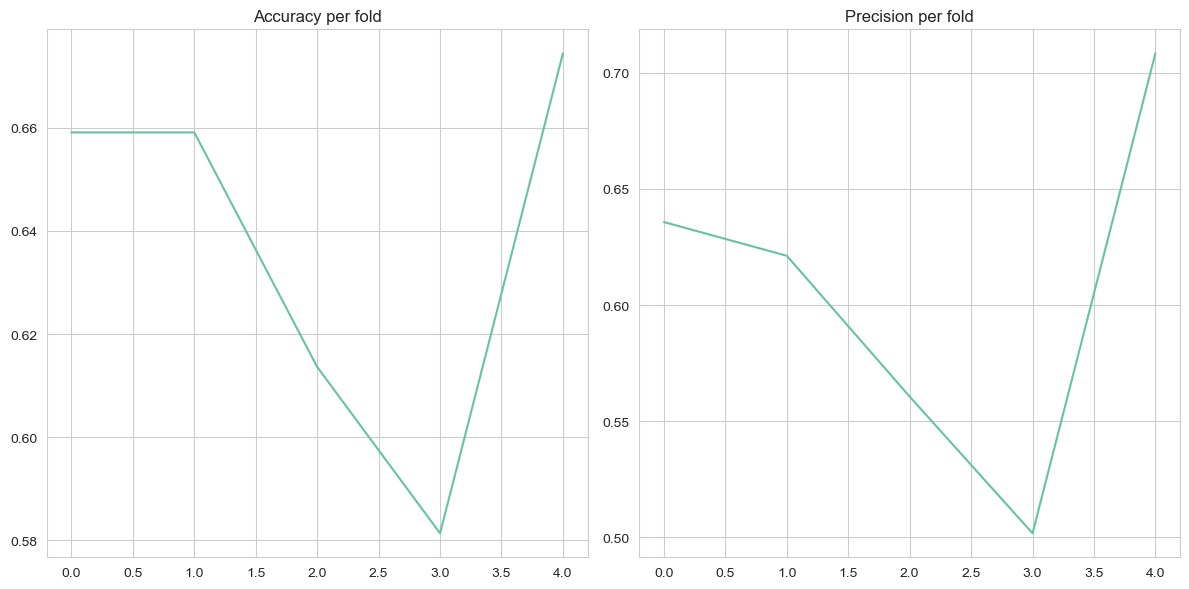

In [38]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(results.index, results['Accuracy'], label='Accuracy')
plt.title('Accuracy per fold')

plt.subplot(1, 2, 2)
plt.plot(results.index, results['Precision'], label='Precision')
plt.title('Precision per fold')

plt.tight_layout()
plt.show()

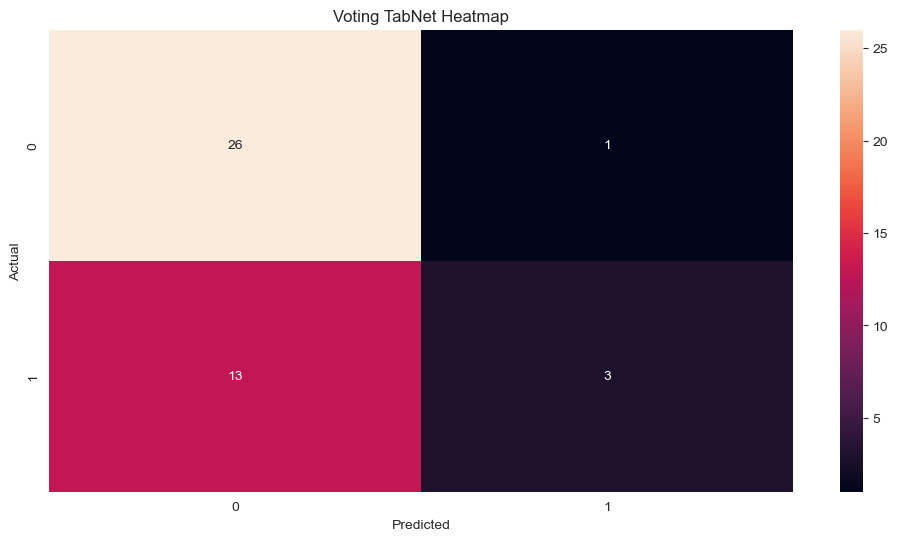

<Figure size 1200x600 with 0 Axes>

In [39]:
sns.heatmap(tabnet_cm, annot=True, fmt="d")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Voting TabNet Heatmap')
plt.show()
plt.savefig('voting_tabnet_confusion.png')

### Overall Comparison

In [40]:
all_metrics = []

lr_metrics = ['Logistic Regression'] + avg_lr_metrics.tolist()
all_metrics.append(lr_metrics)

tabnet_metrics = ['TabNet'] + avg_tabnet_metrics.tolist()
all_metrics.append(tabnet_metrics)

grid_search_metrics = ['Grid Search'] + df_results.sort_values(by='loss').head(1).values.tolist()[0][1:5]
all_metrics.append(grid_search_metrics)

random_search_metrics = ['Random Search'] + df_results_random.sort_values(by='loss').head(1).values.tolist()[0][1:5]
all_metrics.append(random_search_metrics)

columns = ['Implementation', 'Accuracy', 'Precision', 'Recall', 'F1 Score']
df_all_metrics = pd.DataFrame(all_metrics, columns=columns)

print(df_all_metrics)

        Implementation  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.945137   0.944174  0.939231  0.940993
1               TabNet  0.637526   0.605530  0.569579  0.559075
2          Grid Search  0.935941   0.932747  0.931956  0.931456
3        Random Search  0.926638   0.923747  0.924681  0.921849


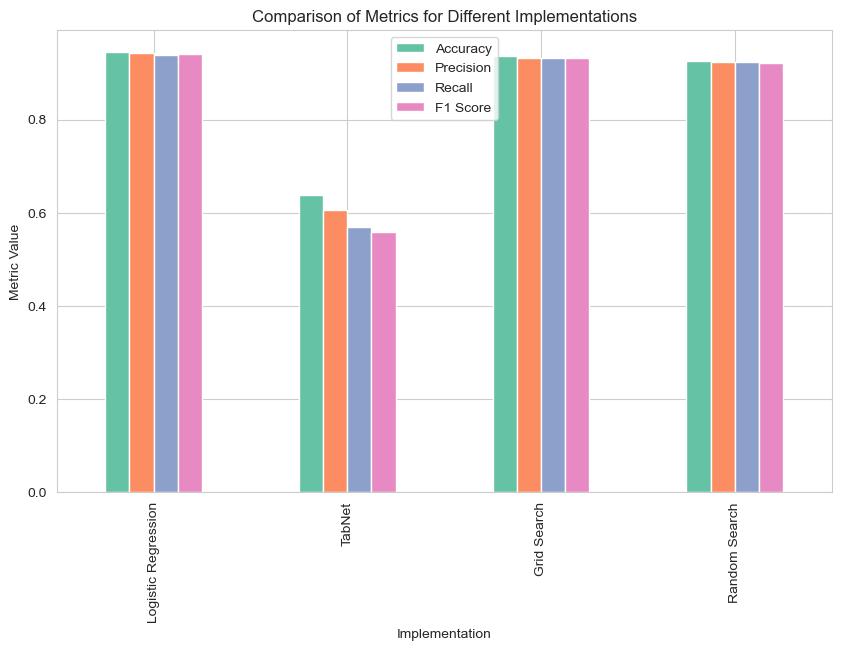

<Figure size 1200x600 with 0 Axes>

In [41]:
df_all_metrics.set_index('Implementation', inplace=True)

df_all_metrics.plot(kind='bar', figsize=(10, 6))
plt.title('Comparison of Metrics for Different Implementations')
plt.ylabel('Metric Value')
plt.xlabel('Implementation')
plt.show()
plt.savefig('voting_barplot.png')

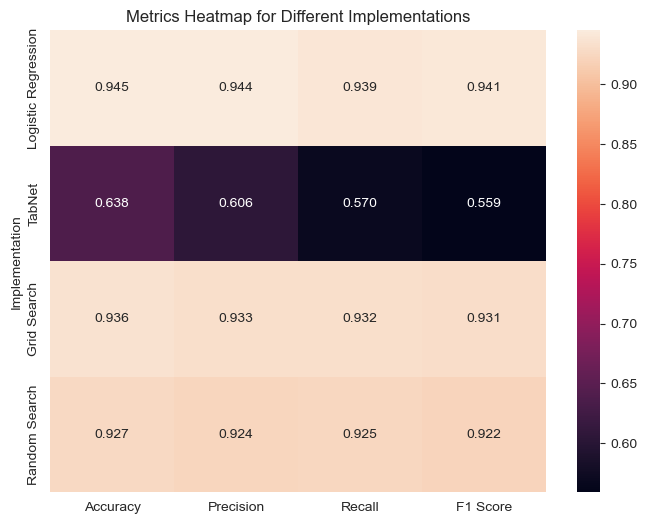

<Figure size 1200x600 with 0 Axes>

In [42]:
plt.figure(figsize=(8, 6))
sns.heatmap(df_all_metrics, annot=True, fmt=".3f")
plt.title('Metrics Heatmap for Different Implementations')
plt.show()
plt.savefig('voting_all_heatmap.png')